In [2]:
#importing python script having all required libraries imported
# script also contains a function to clean and generate tokenized tweets 
from tweet_cleaning import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
#importing tweets
first= pd.read_csv(r'D:\Academics\Project-Social Media Mining\New file\covid.csv', usecols=['created_at','lang','text','user_location'])
print(first.shape)
first.head()

(4889621, 4)


,created_at,lang,text,user_location
0,Thu Jan 30 18:25:07 +0000 2020,es,RT @ChalecosAmarill: 🎥🆘️ #coronavirus \n\n⚠️As...,"Madrid, Comunidad de Madrid"
1,Wed Jan 29 20:21:48 +0000 2020,en,@KGWNews You get sick from cheap Mexican beer ...,"Oregon, USA"
2,Fri Jan 31 14:10:08 +0000 2020,th,RT @_wawao: เบียร์ยี่ห้อ Corona จะบริจาคเงิน 1...,NaN
3,Fri Jan 31 22:40:36 +0000 2020,in,RT @KonghucuGL: Tuh lagi kan....Perih'kan....\...,"Bandung, Jawa Barat"
4,Thu Jan 30 10:13:08 +0000 2020,en,RT @krizzy_kalerqui: The Chinese woman inflict...,NaN


In [4]:
#importing tweets
second= pd.read_csv(r'D:\Academics\Project-Social Media Mining\New file\covid-csv-2.csv', usecols=['created_at','lang','text','user_location'])
print(second.shape)
second.head()

(4358426, 4)


,created_at,lang,text,user_location
0,Sat May 09 00:36:03 +0000 2020,en,RT @HyltonRobin: Fauci Lied: Hydroxychloroquin...,Georgia
1,Fri May 15 11:10:41 +0000 2020,pt,Bahia contabiliza 6.955 casos confirmados do n...,"Petrolina, Brasil"
2,Sat May 16 20:50:09 +0000 2020,en,"RT @DrZweliMkhize: As of today, the total numb...",Somewhere in Africa Dzonga
3,Wed May 06 03:43:12 +0000 2020,en,RT @YahooNews: GOP lawmaker opposes coronaviru...,"Auckland Central, Auckland"
4,Wed May 27 08:22:45 +0000 2020,und,🤣@rgcorner https://t.co/TtW22c1Uvu,"Bangor, Wales"


In [5]:
first = first[first['lang']=='en']
second = second[second['lang']=='en']
print(first.shape)
print(second.shape)

(3235891, 4)
(2913319, 4)


In [6]:
data = pd.concat([first,second])
data.shape

(6149210, 4)

In [ ]:
# clean is a function defined in a python script, it applies all preprocessing steps to clean and generates tokenized tweets
data['Tweets'] = data['text'].apply(clean)
data.head(10)

In [ ]:
# finding any row with no tweets after preprocessing and drop those rows
empty_indexlist=list(data[data['Tweets'].str.len() < 3].index)
print("number of empty rows: ",len(empty_indexlist))
empty_indexlist1=list(data[data['Tweets'].str.len() < 2].index)
print("number of empty rows: ",len(empty_indexlist1))
empty_indexlist2=list(data[data['Tweets'].str.len() < 1].index)
print("number of empty rows: ",len(empty_indexlist2))

In [ ]:
data=data.drop(empty_indexlist2)
data=data.reset_index(drop=True)
print(data.shape)
data.head(10)

In [14]:
vaclist=set(['injection','prevention','shot','vaccination','anesthetic','antibiotic','antidote','antiseptic','antitoxin',
         'balm','biologic','capsule','cure','dose','drug','elixir','injection','inoculation','liniment','lotion',
         'medicament','ointment','pharmaceutical','pharmacon','physic','pill','potion','prescription','remedy',
         'salve','sedative','serum','tablet','tincture','tonic','vaccine','medication','inoculation','tetanus',
         'rubella','rabies','influenza','infectious', 'disease','hiv','infection','drug','pathogen','antibiotic',
         'immune system','antibody','antigen','immunization','mumps','rotavirus','immunity',
         'disease','polio','prophylaxis','vaccinations','insulin','flu','antiviral','therapeutic','vaccinated','pneumovax',
         'tuberculosis','penicillin','doses','hpv','pneumococcal'])
print(len(vaclist))

74


In [15]:
def findvacword(row):
    for word in row:
        if word in vaclist:
            return True
        else:
            continue
    return False

In [16]:
#data1=data.head(100)
data=pd.DataFrame(data[data['Tweets'].apply(findvacword)==True])

In [17]:
print(data.shape)
data.head()

(275400, 5)


,created_at,lang,text,user_location,Tweets
31,Wed Jan 29 05:54:27 +0000 2020,en,RT @PIB_India: Advisory for #CoronaVirus\n\nHo...,NaN,"[advisory, homoeopathy, prevention, corona, vi..."
49,Sun Jan 26 16:48:06 +0000 2020,en,RT @joshuawongcf: 11/ There are cases of Wuhan...,NaN,"[cases, infection, reported, taiwan, singapore..."
63,Sun Jan 26 17:12:11 +0000 2020,en,RT @faizalhamssin: Wuhan Flu is dangerous and ...,Malaysia,"[wuhan, flu, dangerous, all, know, also, dange..."
65,Fri Jan 24 11:48:54 +0000 2020,en,@Msgargoyle13 @howroute @mason4922 No. CDC won...,✋,"[cdc, wont, even, give, reasonable, recommenda..."
90,Thu Jan 30 03:36:47 +0000 2020,en,RT @KingTrillaX: The fact that there’s no way ...,Canarsie/ Westbury,"[fact, theres, way, cure, theres, still, open,..."


In [20]:
# importing library to apply sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data['Tweets'].str.join(" ").apply(lambda x: sid.polarity_scores(x))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
data.head(10)

,created_at,lang,text,user_location,Tweets,sentiments
31,Wed Jan 29 05:54:27 +0000 2020,en,RT @PIB_India: Advisory for #CoronaVirus\n\nHo...,NaN,"[advisory, homoeopathy, prevention, corona, vi...","{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp..."
49,Sun Jan 26 16:48:06 +0000 2020,en,RT @joshuawongcf: 11/ There are cases of Wuhan...,NaN,"[cases, infection, reported, taiwan, singapore...","{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'comp..."
63,Sun Jan 26 17:12:11 +0000 2020,en,RT @faizalhamssin: Wuhan Flu is dangerous and ...,Malaysia,"[wuhan, flu, dangerous, all, know, also, dange...","{'neg': 0.569, 'neu': 0.431, 'pos': 0.0, 'comp..."
65,Fri Jan 24 11:48:54 +0000 2020,en,@Msgargoyle13 @howroute @mason4922 No. CDC won...,✋,"[cdc, wont, even, give, reasonable, recommenda...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
90,Thu Jan 30 03:36:47 +0000 2020,en,RT @KingTrillaX: The fact that there’s no way ...,Canarsie/ Westbury,"[fact, theres, way, cure, theres, still, open,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
122,Wed Jan 29 11:48:27 +0000 2020,en,RT @AJEnglish: Scientists are working on devel...,Nigeria,"[scientists, working, developing, vaccine, new]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
183,Tue Jan 28 13:59:06 +0000 2020,en,RT @2020predicts: The Coronavirus death toll h...,NaN,"[death, toll, risen, leaves, people, infected,...","{'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'comp..."
251,Fri Jan 24 19:30:01 +0000 2020,en,"Seen this hysteria w/ HIV, SARS, Ebola &amp; n...","PhD virologist, medical writer, dream detectiv...","[seen, hysteria, hiv, sars, ebola, amp, call, ...","{'neg': 0.341, 'neu': 0.543, 'pos': 0.116, 'co..."
254,Mon Jan 27 13:41:15 +0000 2020,en,“buh buh buh the coronavirus is from chinese e...,"she/her, 18, ⚢","[chinese, eating, practices, change, like, uni...","{'neg': 0.253, 'neu': 0.561, 'pos': 0.186, 'co..."
261,Tue Jan 28 14:55:39 +0000 2020,en,The Brazilian market accompanied global concer...,"Caracas, Venezuela","[brazilian, market, accompanied, global, conce...","{'neg': 0.391, 'neu': 0.609, 'pos': 0.0, 'comp..."


In [22]:
# polarity scores generate dictionary of positive, negative, neutral and compund values of tweets
# here we drop sentiments columns from data and replace it with its series
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)
data.head(10)

,created_at,lang,text,user_location,Tweets,neg,neu,pos,compound
31,Wed Jan 29 05:54:27 +0000 2020,en,RT @PIB_India: Advisory for #CoronaVirus\n\nHo...,NaN,"[advisory, homoeopathy, prevention, corona, vi...",0.000,0.734,0.266,0.4404
49,Sun Jan 26 16:48:06 +0000 2020,en,RT @joshuawongcf: 11/ There are cases of Wuhan...,NaN,"[cases, infection, reported, taiwan, singapore...",0.192,0.808,0.000,-0.2263
63,Sun Jan 26 17:12:11 +0000 2020,en,RT @faizalhamssin: Wuhan Flu is dangerous and ...,Malaysia,"[wuhan, flu, dangerous, all, know, also, dange...",0.569,0.431,0.000,-0.8979
65,Fri Jan 24 11:48:54 +0000 2020,en,@Msgargoyle13 @howroute @mason4922 No. CDC won...,✋,"[cdc, wont, even, give, reasonable, recommenda...",0.000,1.000,0.000,0.0000
90,Thu Jan 30 03:36:47 +0000 2020,en,RT @KingTrillaX: The fact that there’s no way ...,Canarsie/ Westbury,"[fact, theres, way, cure, theres, still, open,...",0.000,1.000,0.000,0.0000
122,Wed Jan 29 11:48:27 +0000 2020,en,RT @AJEnglish: Scientists are working on devel...,Nigeria,"[scientists, working, developing, vaccine, new]",0.000,1.000,0.000,0.0000
183,Tue Jan 28 13:59:06 +0000 2020,en,RT @2020predicts: The Coronavirus death toll h...,NaN,"[death, toll, risen, leaves, people, infected,...",0.504,0.496,0.000,-0.7964
251,Fri Jan 24 19:30:01 +0000 2020,en,"Seen this hysteria w/ HIV, SARS, Ebola &amp; n...","PhD virologist, medical writer, dream detectiv...","[seen, hysteria, hiv, sars, ebola, amp, call, ...",0.341,0.543,0.116,-0.7351
254,Mon Jan 27 13:41:15 +0000 2020,en,“buh buh buh the coronavirus is from chinese e...,"she/her, 18, ⚢","[chinese, eating, practices, change, like, uni...",0.253,0.561,0.186,-0.4404
261,Tue Jan 28 14:55:39 +0000 2020,en,The Brazilian market accompanied global concer...,"Caracas, Venezuela","[brazilian, market, accompanied, global, conce...",0.391,0.609,0.000,-0.8271


In [23]:
#pip install wordcould

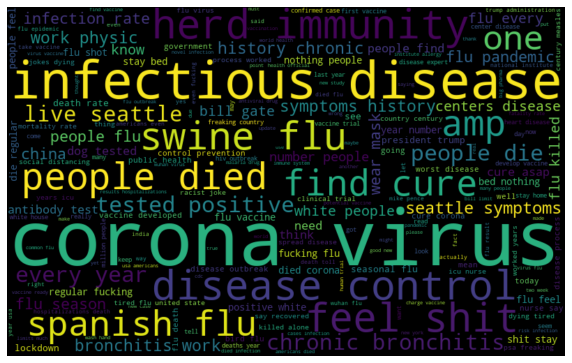

In [25]:
# storing all words from tweets in a list to visualize in wordcoud
all_words = ' '.join([text for text in data['Tweets'].str.join(" ")])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


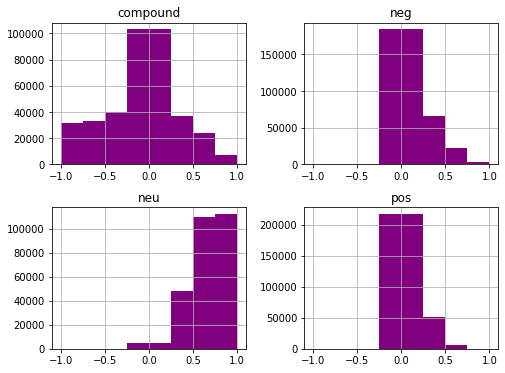

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
data.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],ax=ax,color="purple")

#plt.title("Sentiments from Tweets on Climate Change")
plt.show()

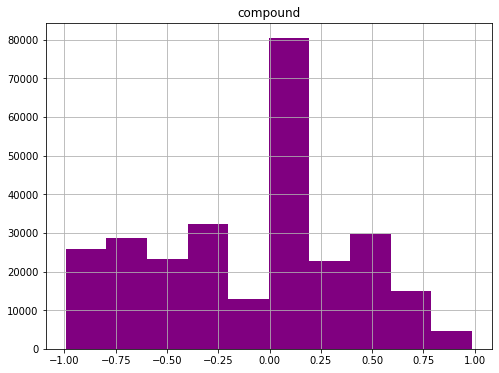

In [27]:
sentiment_df = pd.DataFrame(data, columns=["compound", "Tweets"])
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(ax=ax,color="purple")

#plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [28]:
# function to name a tweet based on compound score and append the list in dataframe 
def Analyze_score(score):
    if score < -0.5:
        return 'Negative'
    elif score > 0.5:
        return 'Positive'
    else:
        return 'Neutral'
data['Analysis'] = data['compound'].apply(Analyze_score)
data.head()

,created_at,lang,text,user_location,Tweets,neg,neu,pos,compound,Analysis
31,Wed Jan 29 05:54:27 +0000 2020,en,RT @PIB_India: Advisory for #CoronaVirus\n\nHo...,NaN,"[advisory, homoeopathy, prevention, corona, vi...",0.000,0.734,0.266,0.4404,Neutral
49,Sun Jan 26 16:48:06 +0000 2020,en,RT @joshuawongcf: 11/ There are cases of Wuhan...,NaN,"[cases, infection, reported, taiwan, singapore...",0.192,0.808,0.000,-0.2263,Neutral
63,Sun Jan 26 17:12:11 +0000 2020,en,RT @faizalhamssin: Wuhan Flu is dangerous and ...,Malaysia,"[wuhan, flu, dangerous, all, know, also, dange...",0.569,0.431,0.000,-0.8979,Negative
65,Fri Jan 24 11:48:54 +0000 2020,en,@Msgargoyle13 @howroute @mason4922 No. CDC won...,✋,"[cdc, wont, even, give, reasonable, recommenda...",0.000,1.000,0.000,0.0000,Neutral
90,Thu Jan 30 03:36:47 +0000 2020,en,RT @KingTrillaX: The fact that there’s no way ...,Canarsie/ Westbury,"[fact, theres, way, cure, theres, still, open,...",0.000,1.000,0.000,0.0000,Neutral


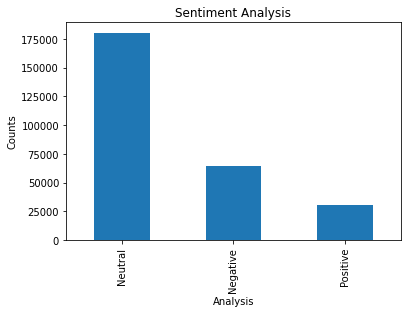

In [29]:
# plotting number of tweets in each sentiment
plt.title('Sentiment Analysis')
plt.xlabel('Analysis')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [22]:
#import matplotlib.pyplot as plt
#plt.hist(data.Analysis, bins = 3, align= 'mid')
#plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
#plt.xlabel('Sentiment of Reviews')
#plt.title('Distribution of Sentiment')
#plt.show()

In [30]:
# creating a month column to group data with month
data['created_at']= data['created_at'].astype('datetime64[ns]')
data['month']=pd.DatetimeIndex(data['created_at']).month
data.head()

,created_at,lang,text,user_location,Tweets,neg,neu,pos,compound,Analysis,month
31,2020-01-29 05:54:27,en,RT @PIB_India: Advisory for #CoronaVirus\n\nHo...,NaN,"[advisory, homoeopathy, prevention, corona, vi...",0.000,0.734,0.266,0.4404,Neutral,1
49,2020-01-26 16:48:06,en,RT @joshuawongcf: 11/ There are cases of Wuhan...,NaN,"[cases, infection, reported, taiwan, singapore...",0.192,0.808,0.000,-0.2263,Neutral,1
63,2020-01-26 17:12:11,en,RT @faizalhamssin: Wuhan Flu is dangerous and ...,Malaysia,"[wuhan, flu, dangerous, all, know, also, dange...",0.569,0.431,0.000,-0.8979,Negative,1
65,2020-01-24 11:48:54,en,@Msgargoyle13 @howroute @mason4922 No. CDC won...,✋,"[cdc, wont, even, give, reasonable, recommenda...",0.000,1.000,0.000,0.0000,Neutral,1
90,2020-01-30 03:36:47,en,RT @KingTrillaX: The fact that there’s no way ...,Canarsie/ Westbury,"[fact, theres, way, cure, theres, still, open,...",0.000,1.000,0.000,0.0000,Neutral,1


In [32]:
data.shape

(275400, 11)

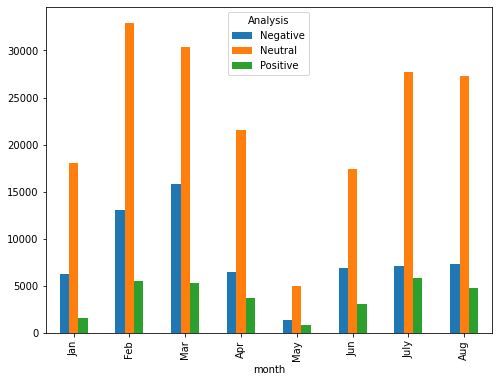

In [31]:
# visualizing sentiments of tweets in each month
fig, ax = plt.subplots(figsize=(8, 6))
tweet_sentiment = data.groupby(['month', 'Analysis']).Analysis.count().unstack()
tweet_sentiment.plot(kind='bar',ax=ax)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','July','Aug'])
plt.show()

In [33]:
#https://www.washingtonpost.com/health/2020/07/27/moderna-nih-launch-30000-person-trial-coronavirus-vaccine/

In [34]:
negdata = data[data['Analysis']=='Negative']
negdata.shape

(64417, 11)

In [35]:
# storing tweets into a list to loop
lines=negdata['Tweets'].tolist()

In [37]:
# Creating a list for cleaned sentences after the preprocessing is done
train_clean_sentences = []
for line in lines:
    cleaned = ' '.join(line)
    if(len(cleaned)==0):
        continue
    # Appending all the cleaned tweets into the list    
    train_clean_sentences.append(cleaned)
#print(train_clean_sentences)

In [38]:
# Creating a datframe from the list of cleaned tweets 
Cleaned_tweets = pd.DataFrame(train_clean_sentences, columns=['cleaned_tweets'])

In [39]:
Cleaned_tweets.head(10)

,cleaned_tweets
0,wuhan flu dangerous all know also dangerous ma...
1,death toll risen leaves people infected diseas...
2,seen hysteria hiv sars ebola amp call wuhan vi...
3,brazilian market accompanied global concerns d...
4,worry worry flu
5,wuhan virus current estimate patients become s...
6,million people get flu year people million peo...
7,one main reason wuhan virus dangerous incubati...
8,run criminals amp officials profit stolen pets...
9,story interview woman apparently shot viral vi...


In [40]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# the vectorizer object will transform tweet text into a vector
#vectorizer = CountVectorizer(min_df=10, token_pattern='[a-zA-Z0-9]{3,}')
vectorizer = TfidfVectorizer(stop_words='english', min_df=10, token_pattern='[a-zA-Z0-9]{3,}')
# applying transformation
tf = vectorizer.fit_transform(Cleaned_tweets['cleaned_tweets']) #.toarray()
# storing names of each column in the matrix
tf_feature_names = vectorizer.get_feature_names()
tf.shape

(64417, 4999)

In [42]:
# importing LDA model from Sklearn to apply topic modelling
from sklearn.decomposition import LatentDirichletAllocation
# importing grid serach cv module to find best parameters for the model 
from sklearn.model_selection import GridSearchCV
params = {'n_components': [5,10]}

# Initializing the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=params)

# Do the Grid Search
model.fit(tf)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [43]:
# storing model with best parameters in object
best_lda_model = model.best_estimator_

# printing best parameters obtained from gridsearch cv
print("Best Model's Params: ", model.best_params_)

Best Model's Params:  {'n_components': 5}


In [44]:
#lda_output = best_lda_model.fit_transform(tf)
lda_output = best_lda_model.transform(tf)

# creating a topic matrix

# index names
docnames = ["Doc" + str(i) for i in range(len(train_clean_sentences))]
# storing column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# creating a list of best topic for each document and storing in dataframe
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic.head(15)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.05,0.05,0.80,0.05,0.05,2
Doc1,0.05,0.05,0.05,0.05,0.79,4
Doc2,0.04,0.04,0.04,0.83,0.04,3
Doc3,0.05,0.40,0.16,0.18,0.22,1
Doc4,0.09,0.62,0.09,0.09,0.09,1
Doc5,0.05,0.05,0.46,0.40,0.05,2
Doc6,0.07,0.07,0.07,0.07,0.74,4
Doc7,0.81,0.05,0.05,0.05,0.05,0
Doc8,0.05,0.05,0.05,0.05,0.79,4
Doc9,0.81,0.05,0.05,0.05,0.05,0


In [45]:
# creating dataframe with count of documents in each topic
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,25873
1,4,13728
2,2,10573
3,1,7408
4,0,6835


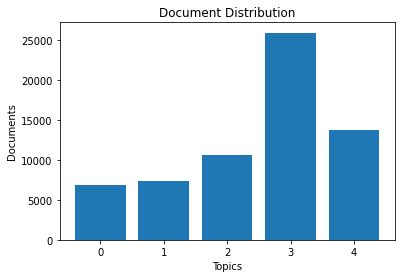

In [46]:
# bar plot of document distribution in each topic
# it is very clear that all topics had almost equal number of documents 
plt.title('Document Distribution')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.bar(df_topic_distribution['Topic Num'], df_topic_distribution['Num Documents'])
plt.show()

In [47]:
# installing pyLDAvis library
#!pip install pyLDAvis

In [48]:
# importing pyLDAvis library which helps in understanding topic generated and gives good representation of words in each topic
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(best_lda_model, tf, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x          y  topics  cluster       Freq
topic                                                   
3       42.527248  14.315937       1        1  34.132901
4       70.991631  26.989771       2        1  20.967917
2       59.116058 -13.322494       3        1  17.321611
0      101.296638  19.739206       4        1  13.870273
1       90.058968 -10.473440       5        1  13.707298, topic_info=     Category         Freq       Term        Total  loglift  logprob
4001  Default  1540.000000       shit  1540.000000  30.0000  30.0000
1683  Default  1483.000000       feel  1483.000000  29.0000  29.0000
3177  Default  3201.000000     people  3201.000000  28.0000  28.0000
4981  Default  1314.000000       year  1314.000000  27.0000  27.0000
4224  Default   807.000000       stay   807.000000  26.0000  26.0000
398   Default   753.000000        bed   753.000000  25.0000  25.0000
4959  Default   889.000000      worst   889.000000  24.0000  24.0000
2981  Default   903.000000     number   903.000000  23.0000  23.0000
2984  Default   667.000000      nurse   667.000000  22.0000  22.0000
3645  Default   837.000000    regular   837.000000  21.0000  21.0000
1827  Default   817.000000    fucking   817.000000  20.0000  20.0000
3613  Default   636.000000  recovered   636.000000  19.0000  19.0000
3403  Default   619.000000    process   619.000000  18.0000  18.0000
2166  Default   618.000000        icu   618.000000  17.0000  17.0000
4939  Default   618.000000     worked   618.000000  16.0000  16.0000
1396  Default   712.000000      dying   712.000000  15.0000  15.0000
4983  Default   786.000000      years   786.000000  14.0000  14.0000
1232  Default  1260.000000        die  1260.000000  13.0000  13.0000
4518  Default   659.000000      tired   659.000000  12.0000  12.0000
3873  Default   786.000000        say   786.000000  11.0000  11.0000
950   Default  1158.000000     corona  1158.000000  10.0000  10.0000
3527  Default   851.000000     racist   851.000000   9.0000   9.0000
1233  Default  1695.000000       died  1695.000000   8.0000   8.0000
2390  Default   705.000000      jokes   705.000000   7.0000   7.0000
2429  Default  1376.000000     killed  1376.000000   6.0000   6.0000
1745  Default  3795.000000        flu  3795.000000   5.0000   5.0000
1275  Default  1652.000000    disease  1652.000000   4.0000   4.0000
2088  Default   387.000000        hiv   387.000000   3.0000   3.0000
4807  Default  1445.000000      virus  1445.000000   2.0000   2.0000
4949  Default   260.000000    worried   260.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
2895   Topic5    26.435592   mutation    27.233885   1.9575  -6.8762
1370   Topic5    26.217199    driving    27.015364   1.9573  -6.8845
4454   Topic5    25.349633  terrifies    26.142197   1.9565  -6.9182
2721   Topic5    26.790323       meat    27.643354   1.9559  -6.8629
4224   Topic5   770.723186       stay   807.306089   1.9409  -3.5036
4750   Topic5    30.467860       uses    31.450772   1.9555  -6.7343
4949   Topic5   239.448385    worried   260.423171   1.9033  -4.6726
2602   Topic5    89.041652       lose    98.546139   1.8858  -5.6618
2136   Topic5    52.674261        hrs    56.931655   1.9095  -6.1868
4451   Topic5   119.329794   terrible   141.381225   1.8177  -5.3690
4952   Topic5   207.380314      worry   259.519018   1.7630  -4.8164
855    Topic5   131.084404   concerns   166.344227   1.7490  -5.2751
1672   Topic5   201.421162       fear   316.928501   1.5340  -4.8455
169    Topic5   222.923177    america   365.164758   1.4937  -4.7441
1543   Topic5    46.106590      exams    52.476214   1.8578  -6.3200
3177   Topic5  1102.002253     people  3201.301849   0.9208  -3.1460
4702   Topic5    90.968367     united   126.294070   1.6591  -5.6404
625    Topic5    79.328154      catch   107.988240   1.6788  -5.7773
2031   Topic5   187.744224     health   441.008693   1.1333  -4.9159
1745   Topic5   551.748507        flu  

In [49]:
# The distance between each blob shows the semantic difference between the topics

In [50]:
#function to create data with top 15 words from topic based on their weights
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,worst,nurse,say,years,recovered,process,icu,worked,disease,hiv,infection,history,died,flu,member
Topic 1,shit,feel,people,stay,bed,flu,infection,worried,disease,america,worry,fear,shot,health,amp
Topic 2,flu,killed,dying,racist,tired,jokes,new,dangerous,pandemic,season,china,war,cdc,wuhan,amp
Topic 3,flu,vaccine,cure,virus,trump,disease,people,amp,kill,worse,like,china,stop,immunity,death
Topic 4,people,flu,year,died,die,number,corona,regular,fucking,virus,death,rate,americans,deaths,million


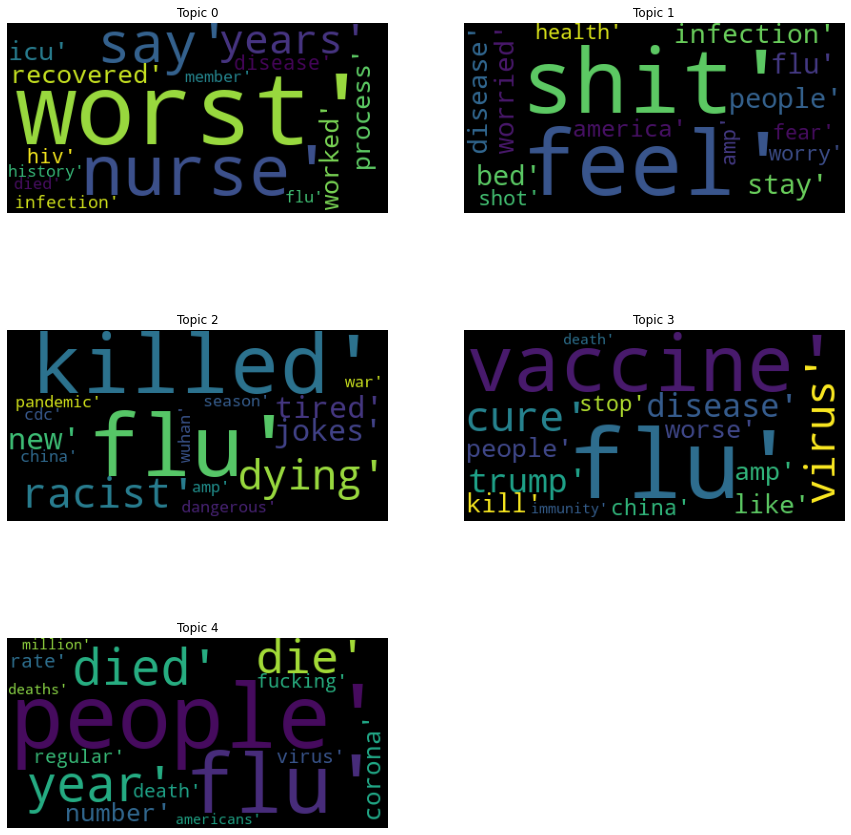

In [51]:
# Importing the word cloud to visulaize the word in each topic, this helps in knowing which words are more common in each topic
from wordcloud import WordCloud

# storing words for each topic in list to loop
words=df_topic_keywords.values.tolist()
fig, axes = plt.subplots(5, 2, figsize=(15,15))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
        topic_words = str(words[i])
        cloud = WordCloud()
        cloud.generate(topic_words)
        fig.subplots_adjust(top = 1.5)
        plt.imshow(cloud)
        plt.gca().set_title('Topic ' + str(i))
        plt.gca().axis('off')
    except IndexError:
        fig.delaxes(ax)
